In [1]:
import pandas as pd

data = pd.read_csv('./data/hana_members.csv')
data.head()

,category,sub_category,title,contents,url
0,Product/Service,Product Guide,Deposit Account Product Guide,HOME\n> Product/Service > Deposit Account > De...,javascript:pbk.web.util.goAjaxMenu('/easyone/c...
1,Product/Service,Product Guide,Easy-One Pack Account,HOME\n> Product/Service > Deposit Account > Ea...,javascript:pbk.web.util.goAjaxMenu('/easyone/c...
2,Product/Service,Product Guide,Easy-One Pack Savings Account,HOME\n> Product/Service > Deposit Account > Ea...,javascript:pbk.web.util.goAjaxMenu('/easyone/c...
3,Product/Service,Product Guide,Easy-One Pack Savings Account,HOME\n> Product/Service > Deposit Account > Ea...,javascript:pbk.web.util.goAjaxMenu('/easyone/c...
4,Product/Service,Product Guide,Easy-One Pack Time Deposit Account,HOME\n> Product/Service > Deposit Account > Ea...,javascript:pbk.web.util.goAjaxMenu('/easyone/c...


## 중복 제거

In [2]:
data.drop_duplicates(inplace=True)
data.to_csv('./data/hana_preprocessed.csv', index=False)

# 데이터 검수

- row 중복 확인
    - title 중복된 경우 -> 1개 페이지에 여러 개 탭 있는 경우. row 하나로 합치기
- 빠진 데이터 없는지 확인
- 전처리 방안 수립


In [3]:
import pandas as pd

data = pd.read_csv('./data/hana_preprocessed.csv')
data.head()

,category,sub_category,title,contents,url
0,Product/Service,Product Guide,Deposit Account Product Guide,HOME\n> Product/Service > Deposit Account > De...,javascript:pbk.web.util.goAjaxMenu('/easyone/c...
1,Product/Service,Product Guide,Easy-One Pack Account,HOME\n> Product/Service > Deposit Account > Ea...,javascript:pbk.web.util.goAjaxMenu('/easyone/c...
2,Product/Service,Product Guide,Easy-One Pack Savings Account,HOME\n> Product/Service > Deposit Account > Ea...,javascript:pbk.web.util.goAjaxMenu('/easyone/c...
3,Product/Service,Product Guide,Easy-One Pack Time Deposit Account,HOME\n> Product/Service > Deposit Account > Ea...,javascript:pbk.web.util.goAjaxMenu('/easyone/c...
4,Product/Service,Product Guide,N°N (Number N) Account,HOME\n> Product/Service > Deposit Account > N°...,javascript:pbk.web.util.goAjaxMenu('/easyone/c...


In [4]:
data['title'].values

array(['Deposit Account Product Guide', 'Easy-One Pack Account',
       'Easy-One Pack Savings Account',
       'Easy-One Pack Time Deposit Account', 'N°N (Number N) Account',
       'YES Keungippeum Deposit Account',
       'Foreign Currency Deposit Account',
       'Foreign Currency Time Deposit Account',
       'The Wide Foreign Currency Savings Account',
       'easy-one Foreign Currency Remittance Service',
       'easy-one Foreign Currency Remittance Service',
       'Easy-One Plus Service', 'Easy-One Remittance Card',
       'Global Local Currency Remittance Service',
       'Asia Preferential Remittance Service', 'Information for Workers',
       'Information for Workers',
       'List of Foreigner Support Organizations', 'Easy-One Pack',
       'Easy-One Pack', 'Easy-One Pack', 'KEB for Expats', 'Newsletter',
       'ISIC Check Card',
       'Preferential Services for Chinese International Students',
       'Happy Email Service', 'About Korea', 'Internet Banking',
       'Easy

> 전처리 이후 title 같은 것끼리 content concat

## 전처리 코드

- 위에 두 줄씩 자르기
- ' '로 join

-> apply axis=1
- title 기준 병합

In [5]:
def preprocessing(row):
    contents = row.split('\n')
    contents = contents[2:]

    contents = ' '.join(contents)

    return contents

In [6]:
import copy

data_preprocessed = copy.deepcopy(data)
data_preprocessed['contents'] = data_preprocessed.apply(lambda x: preprocessing(x['contents']), axis=1)

In [7]:
data.loc[0, 'contents']

'HOME\n> Product/Service > Deposit Account > Deposit Account Product Guide\nDeposit Account Product Guide\nTake a glance at the variety of deposit/savings accounts offered by KEB Hana Bank.\nProduct Product Features Details/Sign-up\nEasy-One Pack Account\nMoney market deposit account (MMDA) for foreign customers\nElectronic banking and ATM fees are waived for customers\nwho use a check card or salary transfers.\nView Details\nEasy-One Pack Savings Account\nInstallment product specially for foreign customers\nPreferential interest rates offered based on transaction history\nAll foreign currency remittance fees are waived when funds are remitted overseas after closing the account.\nView Details\nEasy-One Pack Time Deposit Account\nTime Deposit product especially for foreign customers. The customer can select the product name.\nForeign currency remittance fees are waived when funds are remitted overseas after closing the account.\nView Details\nN°N (Number N) Account\nMoney market deposit

In [8]:
data_preprocessed.loc[0, 'contents']

'Deposit Account Product Guide Take a glance at the variety of deposit/savings accounts offered by KEB Hana Bank. Product Product Features Details/Sign-up Easy-One Pack Account Money market deposit account (MMDA) for foreign customers Electronic banking and ATM fees are waived for customers who use a check card or salary transfers. View Details Easy-One Pack Savings Account Installment product specially for foreign customers Preferential interest rates offered based on transaction history All foreign currency remittance fees are waived when funds are remitted overseas after closing the account. View Details Easy-One Pack Time Deposit Account Time Deposit product especially for foreign customers. The customer can select the product name. Foreign currency remittance fees are waived when funds are remitted overseas after closing the account. View Details N°N (Number N) Account Money market deposit account (MMDA) offering preferential services to customers whose salary is deposited in this

In [9]:
data_preprocessed = data_preprocessed.groupby('title', as_index=False).agg({'category' : 'first', 'sub_category' : 'first', 'title' : 'first', 'contents' : ' '.join, 'url' : 'first'})

In [10]:
data_preprocessed['url'].unique()

array(["javascript:pbk.web.util.goAjaxMenu('/easyone/contents/info/students/wpinf303.do',null,null,null,'wpinf303','61340','61300');",
       "javascript:pbk.web.util.goAjaxMenu('/easyone/contents/products/foreign/wppdt204.do',null,null,null,'wppdt204','62469','59200');",
       "javascript:pbk.web.util.goAjaxMenu('/easyone/contents/products/deposit/wppdt100.do',null,null,null,'wppdt100','59110','59100');",
       "javascript:pbk.web.util.goAjaxMenu('/easyone/contents/useguide/service/wpuge100.do',null,null,null,'wpuge100','62100','62000');",
       "javascript:pbk.web.util.goAjaxMenu('/easyone/contents/info/expats/wpinf200.do',null,null,null,'wpinf200','61210','61200');",
       "javascript:pbk.web.util.goAjaxMenu('/easyone/contents/products/deposit/wppdt101.do',null,null,null,'wppdt101','59120','59100');",
       "javascript:pbk.web.util.goAjaxMenu('/easyone/contents/products/deposit/wppdt102.do',null,null,null,'wppdt102','59130','59100');",
       "javascript:pbk.web.util.goAjaxMenu

In [11]:
data_preprocessed.head()

,category,sub_category,title,contents,url
0,Product/Service,Non-Banking Service,About Korea,About Korea Links to the National Institute fo...,javascript:pbk.web.util.goAjaxMenu('/easyone/c...
1,Product/Service,Product Guide,Asia Preferential Remittance Service,Asia Preferential Remittance Service Remittanc...,javascript:pbk.web.util.goAjaxMenu('/easyone/c...
2,Product/Service,Product Guide,Deposit Account Product Guide,Deposit Account Product Guide Take a glance at...,javascript:pbk.web.util.goAjaxMenu('/easyone/c...
3,Useful Information,What is EasyOne Service for Foreigners?,Easy-One Foreigner Service,Easy-One Foreigner Service KEB Hana Bank's spe...,javascript:pbk.web.util.goAjaxMenu('/easyone/c...
4,Product/Service,Non-Banking Service,Easy-One Pack,Easy-One Pack What is the Easy-One Pack servic...,javascript:pbk.web.util.goAjaxMenu('/easyone/c...


In [12]:
data_preprocessed.to_csv('./data/hana_preprocessed.csv', index=False)

## document 길이 분포 시각화

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('./data/hana_preprocessed.csv')
data.head()

,category,sub_category,title,contents,url
0,Product/Service,Non-Banking Service,About Korea,About Korea Links to the National Institute fo...,javascript:pbk.web.util.goAjaxMenu('/easyone/c...
1,Product/Service,Product Guide,Asia Preferential Remittance Service,Asia Preferential Remittance Service Remittanc...,javascript:pbk.web.util.goAjaxMenu('/easyone/c...
2,Product/Service,Product Guide,Deposit Account Product Guide,Deposit Account Product Guide Take a glance at...,javascript:pbk.web.util.goAjaxMenu('/easyone/c...
3,Useful Information,What is EasyOne Service for Foreigners?,Easy-One Foreigner Service,Easy-One Foreigner Service KEB Hana Bank's spe...,javascript:pbk.web.util.goAjaxMenu('/easyone/c...
4,Product/Service,Non-Banking Service,Easy-One Pack,Easy-One Pack What is the Easy-One Pack servic...,javascript:pbk.web.util.goAjaxMenu('/easyone/c...


In [14]:
data.shape

(34, 5)

In [15]:
def word_length_check(text):
    text_list = text.split(' ')
    return len(text_list)

In [16]:
length = data['contents'].apply(word_length_check)
length.head()

0     156
1     490
2     538
3    1722
4    2556
Name: contents, dtype: int64

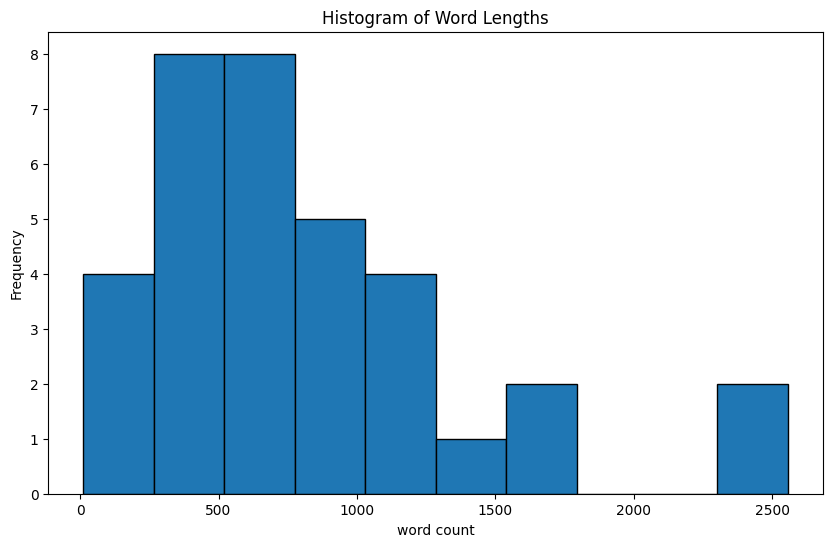

In [17]:
# 히스토그램 시각화
plt.figure(figsize=(10, 6))
plt.hist(length, bins=10, edgecolor='black')
plt.title('Histogram of Word Lengths')
plt.xlabel('word count')
plt.ylabel('Frequency')
plt.show()